![Alt text](https://imgur.com/orZWHly.png=80)
source: @allison_horst https://github.com/allisonhorst/penguins

You have been asked to support a team of researchers who have been collecting data about penguins in Antartica! The data is available in csv-Format as `penguins.csv`

**Origin of this data** : Data were collected and made available by Dr. Kristen Gorman and the Palmer Station, Antarctica LTER, a member of the Long Term Ecological Research Network.

**The dataset consists of 5 columns.**

Column | Description
--- | ---
culmen_length_mm | culmen length (mm)
culmen_depth_mm | culmen depth (mm)
flipper_length_mm | flipper length (mm)
body_mass_g | body mass (g)
sex | penguin sex

Unfortunately, they have not been able to record the species of penguin, but they know that there are **at least three** species that are native to the region: **Adelie**, **Chinstrap**, and **Gentoo**.  Your task is to apply your data science skills to help them identify groups in the dataset!

In [64]:
# Import Required Packages
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

# Loading and examining the dataset
penguins_df = pd.read_csv("penguins.csv")
penguins_df.head()

,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
0,39.1,18.7,181.0,3750.0,MALE
1,39.5,17.4,186.0,3800.0,FEMALE
2,40.3,18.0,195.0,3250.0,FEMALE
3,36.7,19.3,193.0,3450.0,FEMALE
4,39.3,20.6,190.0,3650.0,MALE


## Vérification des valeurs manquantes 

In [65]:
pd.isna(penguins_df).sum()

culmen_length_mm     0
culmen_depth_mm      0
flipper_length_mm    0
body_mass_g          0
sex                  0
dtype: int64

In [66]:
penguins_df.dtypes

culmen_length_mm     float64
culmen_depth_mm      float64
flipper_length_mm    float64
body_mass_g          float64
sex                   object
dtype: object

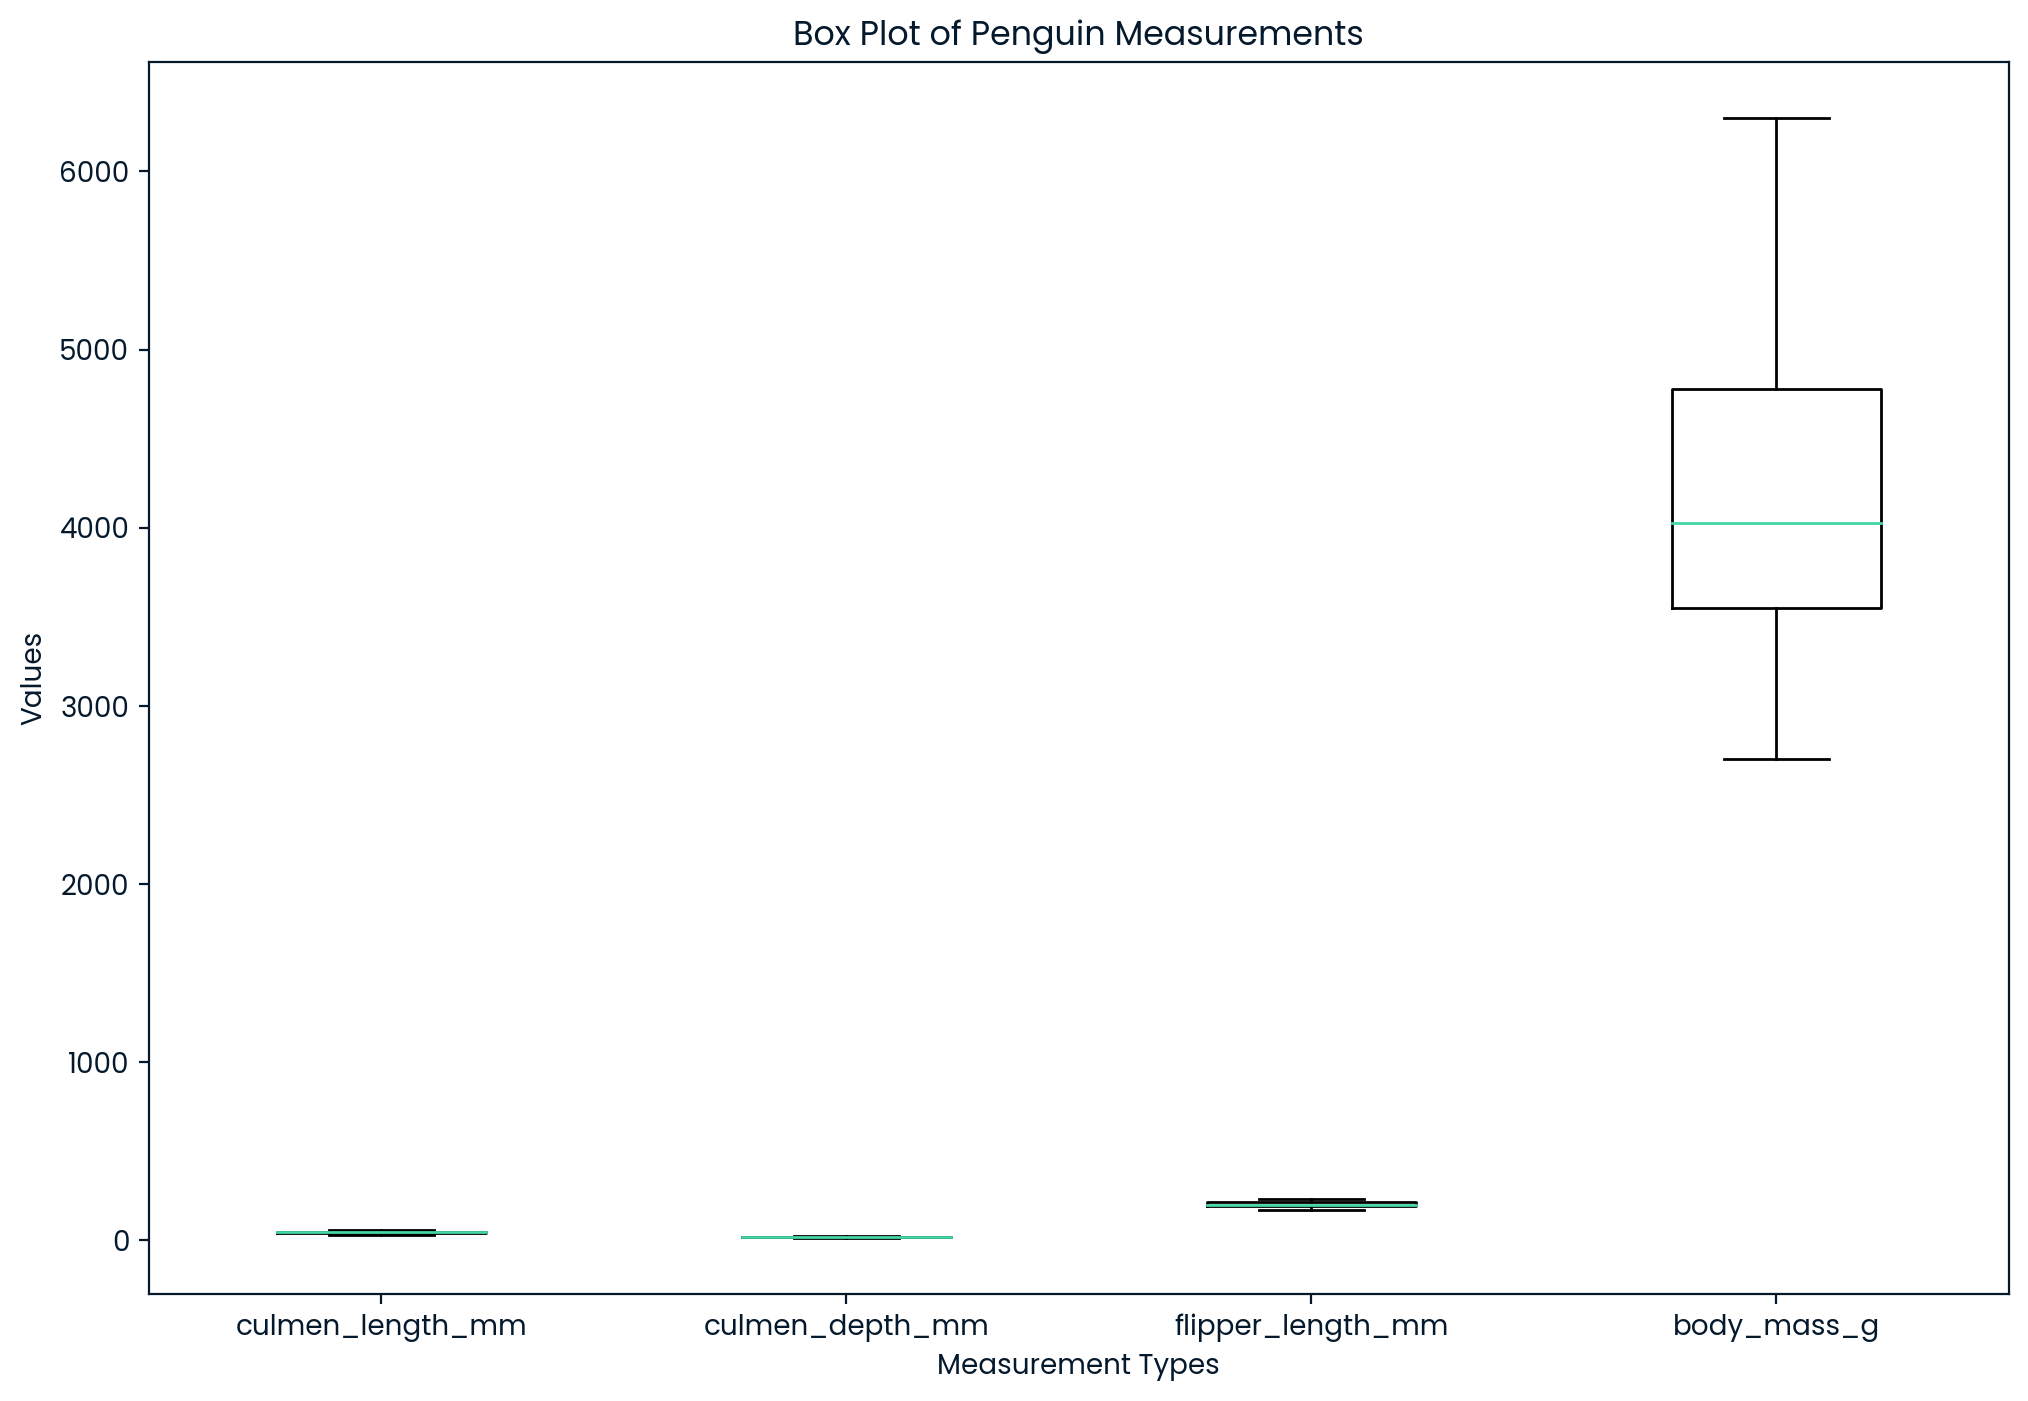

In [67]:
# Box plot for each numerical column in the dataset
plt.figure(figsize=(12, 8))

# List of numerical columns
numerical_columns = ["culmen_length_mm", "culmen_depth_mm", "flipper_length_mm", "body_mass_g"]

# Creating box plots for each numerical column
plt.boxplot([penguins_df[col] for col in numerical_columns], labels=numerical_columns)

# Adding title and labels
plt.title("Box Plot of Penguin Measurements")
plt.ylabel("Values")
plt.xlabel("Measurement Types")

# Display the plot
plt.show()

## Convertir the caegorical variable into numeric variable

In [68]:
penguins_dummies=pd.get_dummies(penguins_df["sex"],drop_first=True)
print(penguins_dummies.head())

   MALE
0     1
1     0
2     0
3     0
4     1


In [69]:
penguins_dummies=pd.concat([penguins_df,penguins_dummies], axis=1)

In [70]:
penguins_dummies

,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex,MALE
0,39.1,18.7,181.0,3750.0,MALE,1
1,39.5,17.4,186.0,3800.0,FEMALE,0
2,40.3,18.0,195.0,3250.0,FEMALE,0
3,36.7,19.3,193.0,3450.0,FEMALE,0
4,39.3,20.6,190.0,3650.0,MALE,1
...,...,...,...,...,...,...
327,47.2,13.7,214.0,4925.0,FEMALE,0
328,46.8,14.3,215.0,4850.0,FEMALE,0
329,50.4,15.7,222.0,5750.0,MALE,1
330,45.2,14.8,212.0,5200.0,FEMALE,0


In [71]:
penguins_dummies.drop(columns=["sex"], axis =1, inplace = True) 


In [72]:
print(penguins_dummies.head())

   culmen_length_mm  culmen_depth_mm  flipper_length_mm  body_mass_g  MALE
0              39.1             18.7              181.0       3750.0     1
1              39.5             17.4              186.0       3800.0     0
2              40.3             18.0              195.0       3250.0     0
3              36.7             19.3              193.0       3450.0     0
4              39.3             20.6              190.0       3650.0     1


In [73]:
scaler = StandardScaler()
scaler.fit(penguins_dummies)

StandardScaler()

In [74]:

kmeans = KMeans(n_clusters = 3, random_state = 0, n_init='auto')
kmeans.fit(penguins_dummies)

KMeans(n_clusters=3, n_init='auto', random_state=0)

In [75]:
len(kmeans.labels_)

332

In [76]:
kmeans.labels_

array([0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 2, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 2, 0, 0, 0, 2, 0, 2, 0, 0, 2, 0,
       2, 0, 2, 0, 0, 0, 0, 0, 0, 0, 2, 0, 2, 0, 0, 0, 2, 0, 2, 0, 0, 0,
       2, 0, 2, 0, 0, 0, 0, 0, 2, 0, 2, 0, 0, 0, 0, 0, 0, 0, 2, 0, 2, 0,
       2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 0, 0, 0, 0, 2, 0, 2, 0, 2, 0, 2, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0,
       2, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2,
       0, 0, 0, 0, 2, 0, 2, 0, 0, 0, 2, 0, 0, 0, 0, 0, 2, 0, 0, 0, 2, 0,
       2, 0, 2, 0, 0, 0, 2, 0, 2, 0, 0, 0, 0, 0, 2, 0, 2, 0, 0, 0, 0, 0,
       2, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 2, 1, 2, 1, 1, 2, 2,
       1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 1, 2, 2, 1, 2, 1, 1, 2, 1,
       1, 2, 1, 1, 1, 1, 2, 1, 2, 1, 0, 1, 2, 2, 1, 2, 2, 1, 1, 1, 2, 1,
       2, 2, 2, 1, 2, 2, 2, 1, 2, 1, 2, 1, 2, 1, 1, 2, 1, 2, 2, 1, 1, 2,
       1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1,

penguins_dummies

In [77]:
len(penguins_dummies)

332

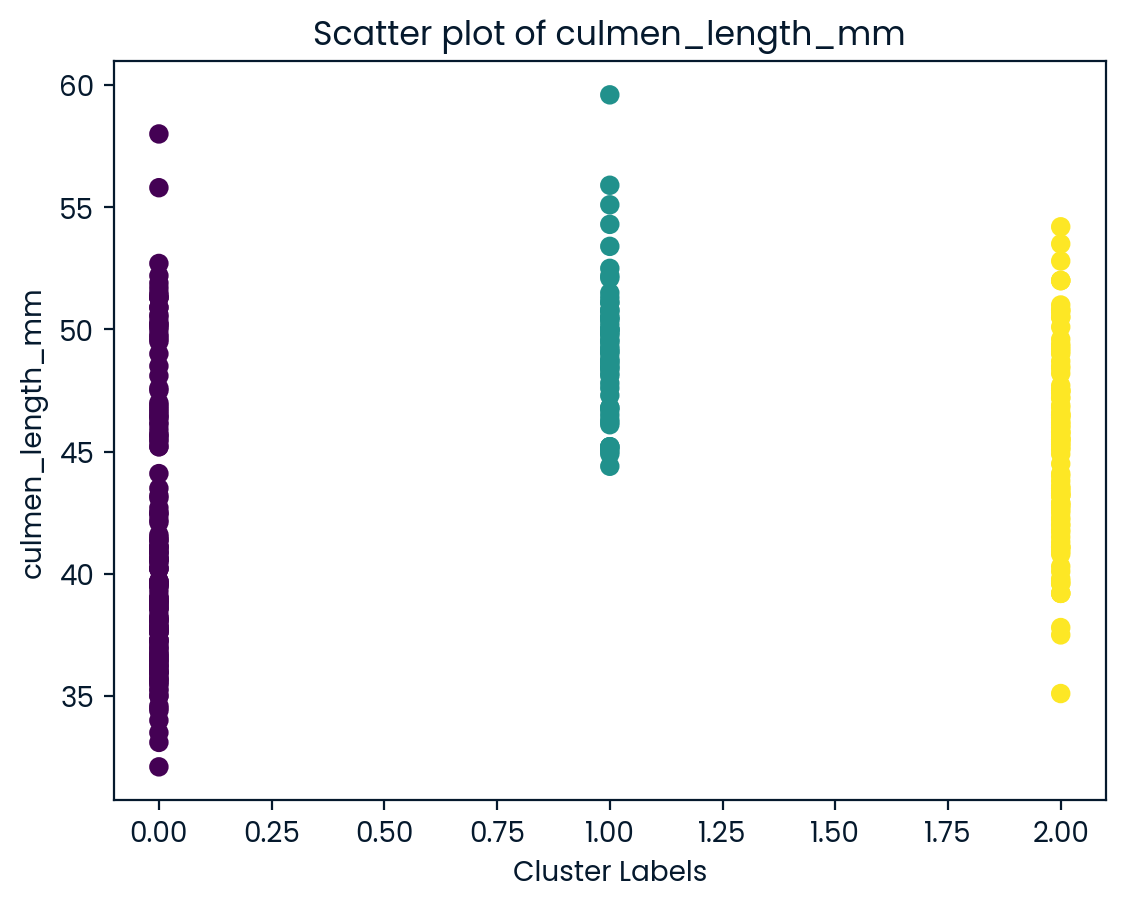

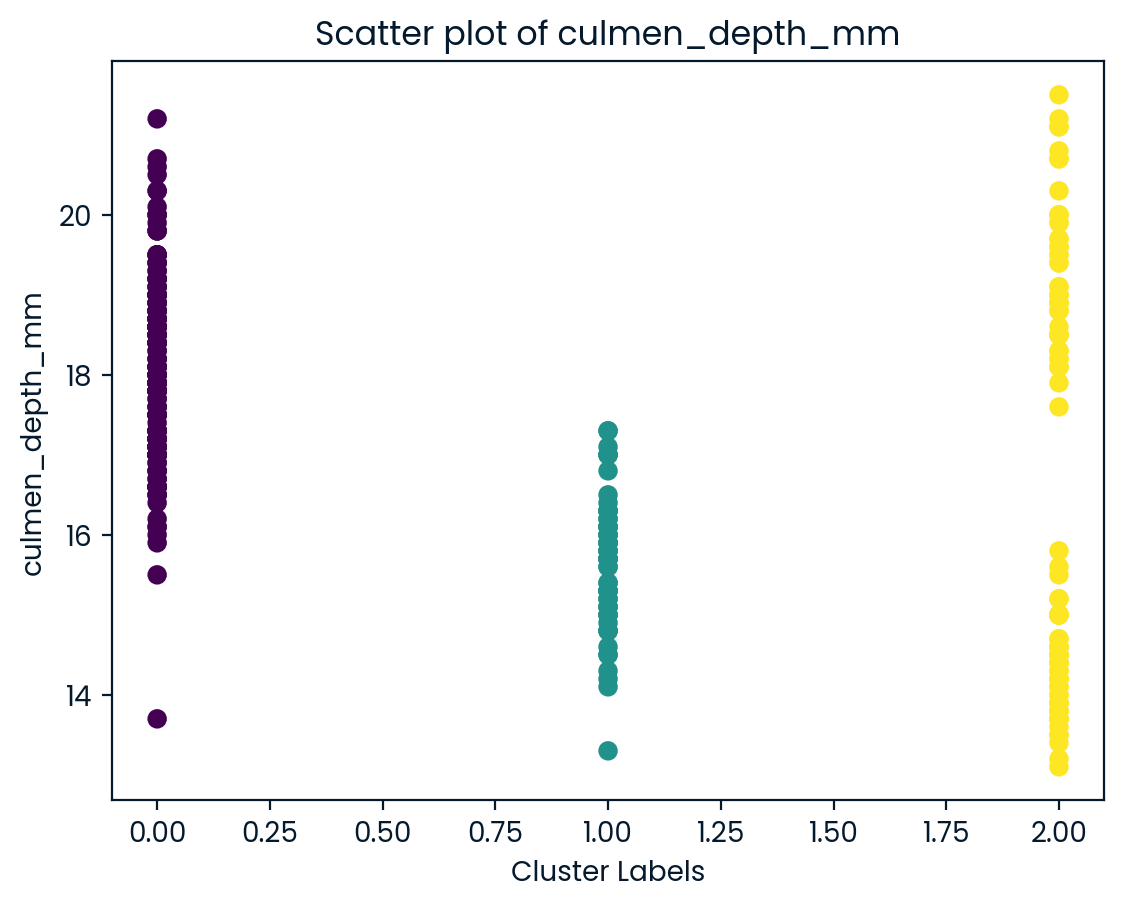

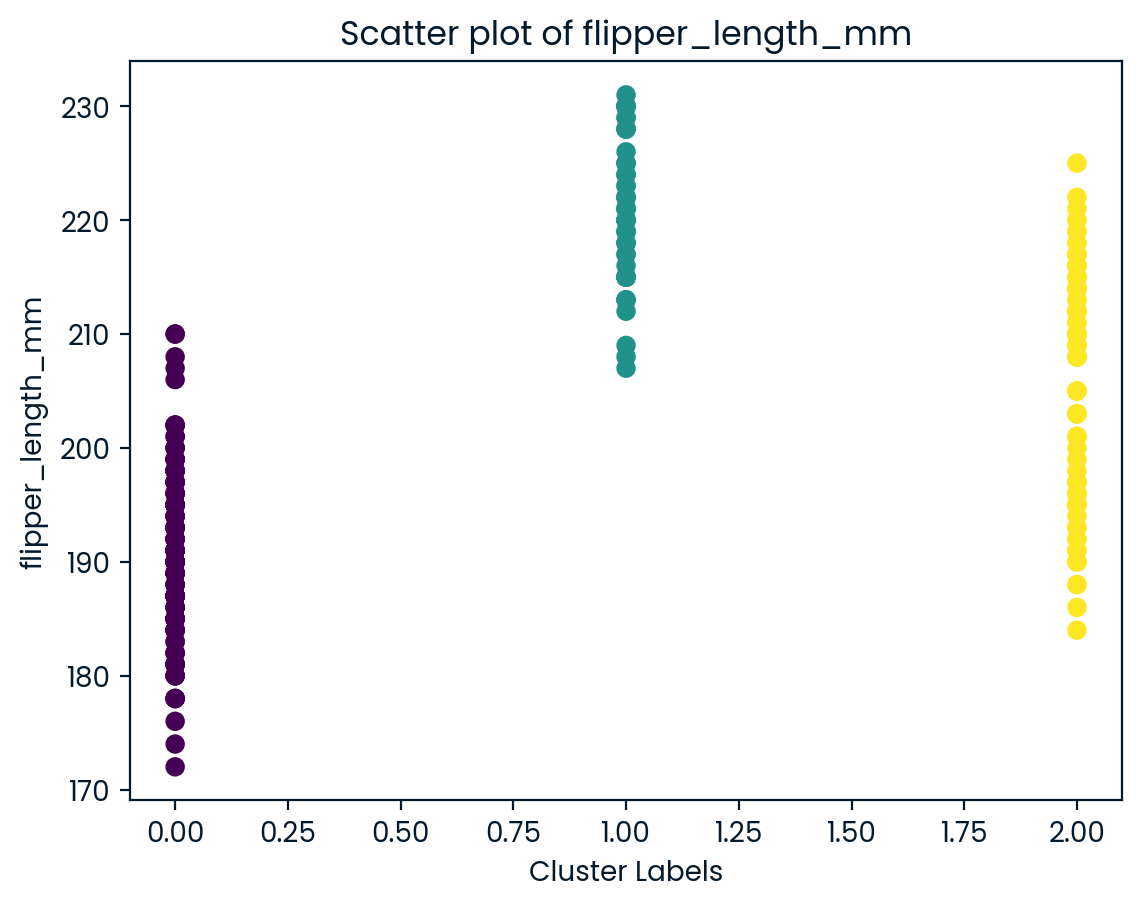

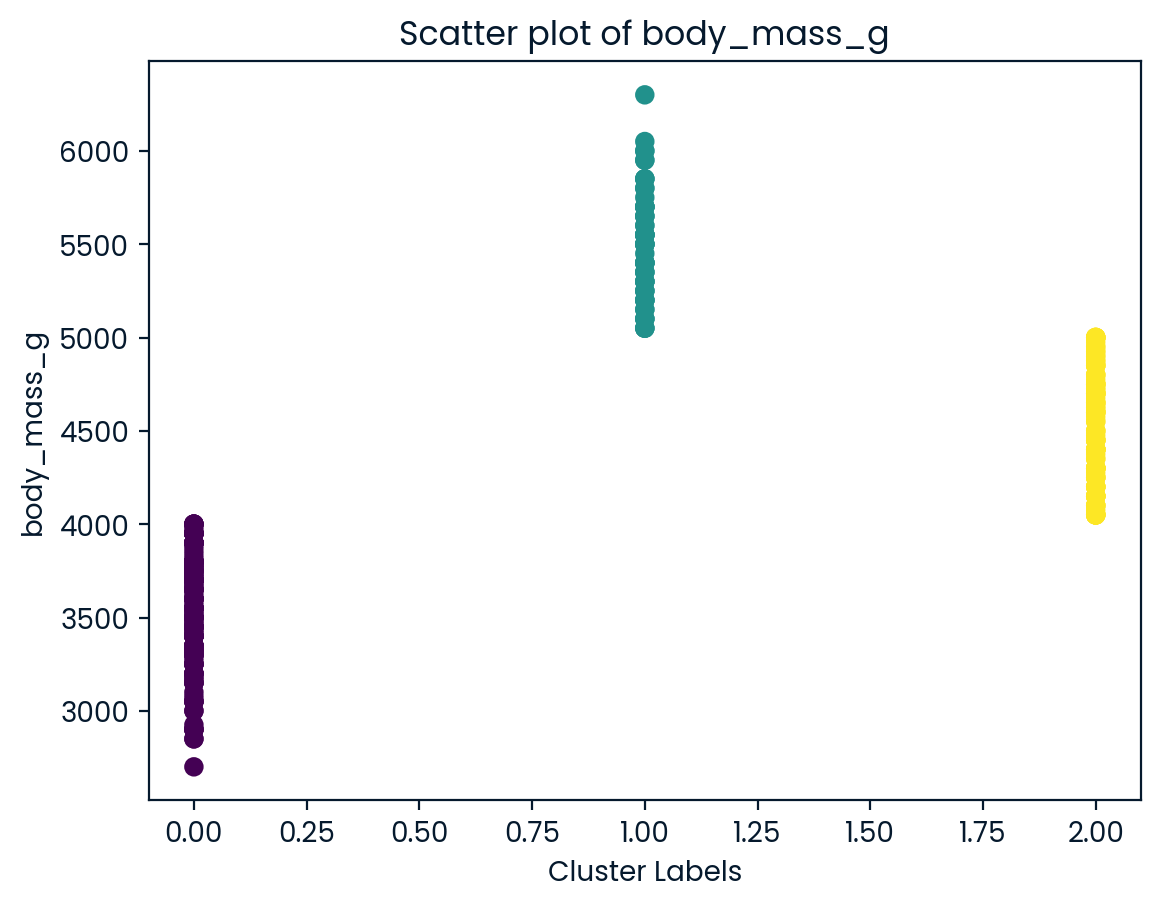

In [78]:
for col in penguins_dummies.columns:
    if col != 'MALE':
       plt.figure()  # Créer une nouvelle figure pour chaque graphique
       plt.scatter(kmeans.labels_, penguins_dummies[col], c=kmeans.labels_)
       plt.title(f'Scatter plot of {col}')
       plt.xlabel('Cluster Labels')
       plt.ylabel(col)
       plt.show()

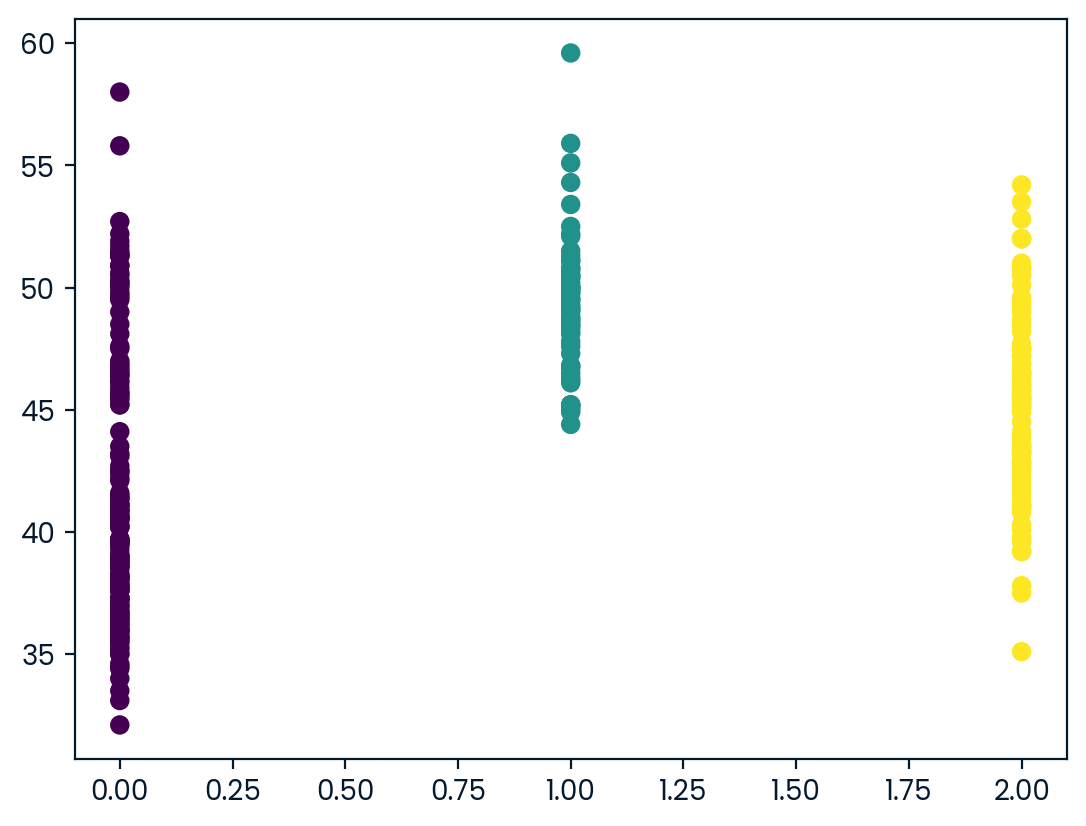

In [79]:
plt.scatter(kmeans.labels_, penguins_dummies['culmen_length_mm'], c=kmeans.labels_)

In [80]:
penguins_dummies.columns

Index(['culmen_length_mm', 'culmen_depth_mm', 'flipper_length_mm',
       'body_mass_g', 'MALE'],
      dtype='object')

In [81]:
numeric_columns = ["culmen_length_mm","culmen_depth_mm", "flipper_length_mm", "body_mass_g"]


In [82]:
penguins_dummies["label"]=kmeans.labels_

In [83]:
stat_penguins = penguins_dummies.groupby('label')[numeric_columns].mean()

In [84]:
stat_penguins

,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g
label,,,,
0,41.392771,18.062651,190.457831,3536.445783
1,49.306557,15.649180,221.065574,5501.639344
2,45.105714,16.588571,205.933333,4513.333333


In [85]:
kmeans.labels_

array([0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 2, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 2, 0, 0, 0, 2, 0, 2, 0, 0, 2, 0,
       2, 0, 2, 0, 0, 0, 0, 0, 0, 0, 2, 0, 2, 0, 0, 0, 2, 0, 2, 0, 0, 0,
       2, 0, 2, 0, 0, 0, 0, 0, 2, 0, 2, 0, 0, 0, 0, 0, 0, 0, 2, 0, 2, 0,
       2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 0, 0, 0, 0, 2, 0, 2, 0, 2, 0, 2, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0,
       2, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2,
       0, 0, 0, 0, 2, 0, 2, 0, 0, 0, 2, 0, 0, 0, 0, 0, 2, 0, 0, 0, 2, 0,
       2, 0, 2, 0, 0, 0, 2, 0, 2, 0, 0, 0, 0, 0, 2, 0, 2, 0, 0, 0, 0, 0,
       2, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 2, 1, 2, 1, 1, 2, 2,
       1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 1, 2, 2, 1, 2, 1, 1, 2, 1,
       1, 2, 1, 1, 1, 1, 2, 1, 2, 1, 0, 1, 2, 2, 1, 2, 2, 1, 1, 1, 2, 1,
       2, 2, 2, 1, 2, 2, 2, 1, 2, 1, 2, 1, 2, 1, 1, 2, 1, 2, 2, 1, 1, 2,
       1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1,